In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('Banglish.csv',encoding= 'unicode_escape')

In [3]:
df.head

<bound method NDFrame.head of       Unnamed: 0   Emotion                                               text
0           4615  surprise           varoter senaprdhan pac diner sfre dhakay
1           6145     happy  alhamdulillahhhmi police vaiyader bolchi tara ...
2           5060     happy                       prithibite bangladesher mukh
3           3115     angry  motrsaikel seba calu ba bikolpo kormosngsthane...
4           6966      fear  ete ekdike sthaniy basindader swasthzjhuki bar...
...          ...       ...                                                ...
3039         415  surprise  mmotoa bndzopadhzayke abar sokj kore agamikal ...
3040        7349  surprise                               vai amra ki manush ?
3041        2415  surprise                         ke bllo BNP kharap ache ??
3042         905   disgust                    sorkari ejentder ninmmaner natk
3043        5367       sad                vai eida deikha kichu lage na? ????

[3044 rows x 3 columns]>

In [4]:
df.groupby("Emotion").describe()

Unnamed: 0                                                           \
              count         mean          std   min      25%     50%     75%   
Emotion                                                                        
angry         491.0  3979.902240  2252.819613   3.0  2010.50  4022.0  6112.0   
disgust       477.0  4025.656184  2234.550677   2.0  2197.00  4193.0  5974.0   
fear          494.0  3768.599190  2223.243660  17.0  1816.00  3649.0  5680.0   
happy         530.0  3783.216981  2238.278699  38.0  1818.75  3732.5  5763.5   
sad           515.0  3641.378641  2164.471590   0.0  1799.50  3524.0  5481.5   
surprise      537.0  3798.471136  2150.175036   8.0  1935.00  3798.0  5528.0   

                  
             max  
Emotion           
angry     7610.0  
disgust   7604.0  
fear      7566.0  
happy     7599.0  
sad       7601.0  
surprise  7605.0

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [7]:
df.columns

Index(['Unnamed: 0', 'Emotion', 'text'], dtype='object')

In [8]:
df.drop(labels='Unnamed: 0', axis=1)

,Emotion,text
0,surprise,varoter senaprdhan pac diner sfre dhakay
1,happy,alhamdulillahhhmi police vaiyader bolchi tara ...
2,happy,prithibite bangladesher mukh
3,angry,motrsaikel seba calu ba bikolpo kormosngsthane...
4,fear,ete ekdike sthaniy basindader swasthzjhuki bar...
...,...,...
3039,surprise,mmotoa bndzopadhzayke abar sokj kore agamikal ...
3040,surprise,vai amra ki manush ?
3041,surprise,ke bllo BNP kharap ache ??
3042,disgust,sorkari ejentder ninmmaner natk


In [9]:
df.head

<bound method NDFrame.head of       Unnamed: 0   Emotion                                               text
0           4615  surprise           varoter senaprdhan pac diner sfre dhakay
1           6145     happy  alhamdulillahhhmi police vaiyader bolchi tara ...
2           5060     happy                       prithibite bangladesher mukh
3           3115     angry  motrsaikel seba calu ba bikolpo kormosngsthane...
4           6966      fear  ete ekdike sthaniy basindader swasthzjhuki bar...
...          ...       ...                                                ...
3039         415  surprise  mmotoa bndzopadhzayke abar sokj kore agamikal ...
3040        7349  surprise                               vai amra ki manush ?
3041        2415  surprise                         ke bllo BNP kharap ache ??
3042         905   disgust                    sorkari ejentder ninmmaner natk
3043        5367       sad                vai eida deikha kichu lage na? ????

[3044 rows x 3 columns]>

In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Label"] = lb_make.fit_transform(df["Emotion"])
df[["Emotion", "Label"]].head(11)



,Emotion,Label
0,surprise,5
1,happy,3
2,happy,3
3,angry,0
4,fear,2
5,disgust,1
6,surprise,5
7,angry,0
8,surprise,5
9,happy,3


In [11]:
df

,Unnamed: 0,Emotion,text,Label
0,4615,surprise,varoter senaprdhan pac diner sfre dhakay,5
1,6145,happy,alhamdulillahhhmi police vaiyader bolchi tara ...,3
2,5060,happy,prithibite bangladesher mukh,3
3,3115,angry,motrsaikel seba calu ba bikolpo kormosngsthane...,0
4,6966,fear,ete ekdike sthaniy basindader swasthzjhuki bar...,2
...,...,...,...,...
3039,415,surprise,mmotoa bndzopadhzayke abar sokj kore agamikal ...,5
3040,7349,surprise,vai amra ki manush ?,5
3041,2415,surprise,ke bllo BNP kharap ache ??,5
3042,905,disgust,sorkari ejentder ninmmaner natk,1


In [12]:
df.isnull()

,Unnamed: 0,Emotion,text,Label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
3039,False,False,False,False
3040,False,False,False,False
3041,False,False,False,False
3042,False,False,False,False


In [13]:
df.dropna(inplace=True)

In [14]:
df

,Unnamed: 0,Emotion,text,Label
0,4615,surprise,varoter senaprdhan pac diner sfre dhakay,5
1,6145,happy,alhamdulillahhhmi police vaiyader bolchi tara ...,3
2,5060,happy,prithibite bangladesher mukh,3
3,3115,angry,motrsaikel seba calu ba bikolpo kormosngsthane...,0
4,6966,fear,ete ekdike sthaniy basindader swasthzjhuki bar...,2
...,...,...,...,...
3039,415,surprise,mmotoa bndzopadhzayke abar sokj kore agamikal ...,5
3040,7349,surprise,vai amra ki manush ?,5
3041,2415,surprise,ke bllo BNP kharap ache ??,5
3042,905,disgust,sorkari ejentder ninmmaner natk,1


In [15]:
text = df['text'].values.tolist()

In [16]:
df.groupby("Emotion").describe()

Unnamed: 0                                                           \
              count         mean          std   min      25%     50%     75%   
Emotion                                                                        
angry         491.0  3979.902240  2252.819613   3.0  2010.50  4022.0  6112.0   
disgust       477.0  4025.656184  2234.550677   2.0  2197.00  4193.0  5974.0   
fear          494.0  3768.599190  2223.243660  17.0  1816.00  3649.0  5680.0   
happy         530.0  3783.216981  2238.278699  38.0  1818.75  3732.5  5763.5   
sad           515.0  3641.378641  2164.471590   0.0  1799.50  3524.0  5481.5   
surprise      537.0  3798.471136  2150.175036   8.0  1935.00  3798.0  5528.0   

                  Label                                     
             max  count mean  std  min  25%  50%  75%  max  
Emotion                                                     
angry     7610.0  491.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
disgust   7604.0  477.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
fear      7566.0  494.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
happy     7599.0  530.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
sad       7601.0  515.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
surprise  7605.0  537.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0

In [17]:
df["Emotion"].value_counts()

surprise    537
happy       530
sad         515
fear        494
angry       491
disgust     477
Name: Emotion, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


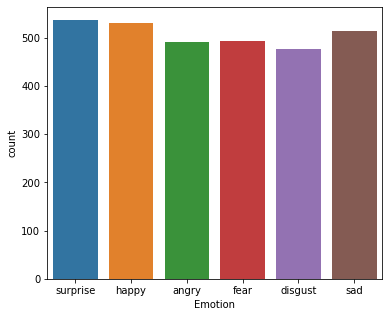

In [18]:
plt.subplots(figsize=(6,5))
sns.countplot(df["Emotion"])
plt.show()

In [19]:
longest_string = max(df["text"], key=len)
print(len(longest_string))

654


In [20]:
text = df["text"]

In [21]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
#train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(3044, 8550)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['Label'], test_size=0.2, random_state=42)

Y_pre = df['Emotion']
target_names = list(set(Y_pre))

In [24]:
target_names

['sad', 'disgust', 'angry', 'fear', 'happy', 'surprise']

In [25]:
X_train

<2435x8550 sparse matrix of type '<class 'numpy.int64'>'
	with 30467 stored elements in Compressed Sparse Row format>

In [26]:
y_train

781     5
2629    2
227     0
365     2
2404    0
       ..
1638    0
1095    4
1130    0
1294    2
860     3
Name: Label, Length: 2435, dtype: int32

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
import seaborn as sn

Test set accuracy 0.5057471264367817
              precision    recall  f1-score   support

         sad       0.44      0.51      0.47        86
     disgust       0.50      0.49      0.50       107
       angry       0.48      0.50      0.49        90
        fear       0.65      0.55      0.60       114
       happy       0.38      0.39      0.39       105
    surprise       0.58      0.59      0.58       107

    accuracy                           0.51       609
   macro avg       0.51      0.50      0.50       609
weighted avg       0.51      0.51      0.51       609



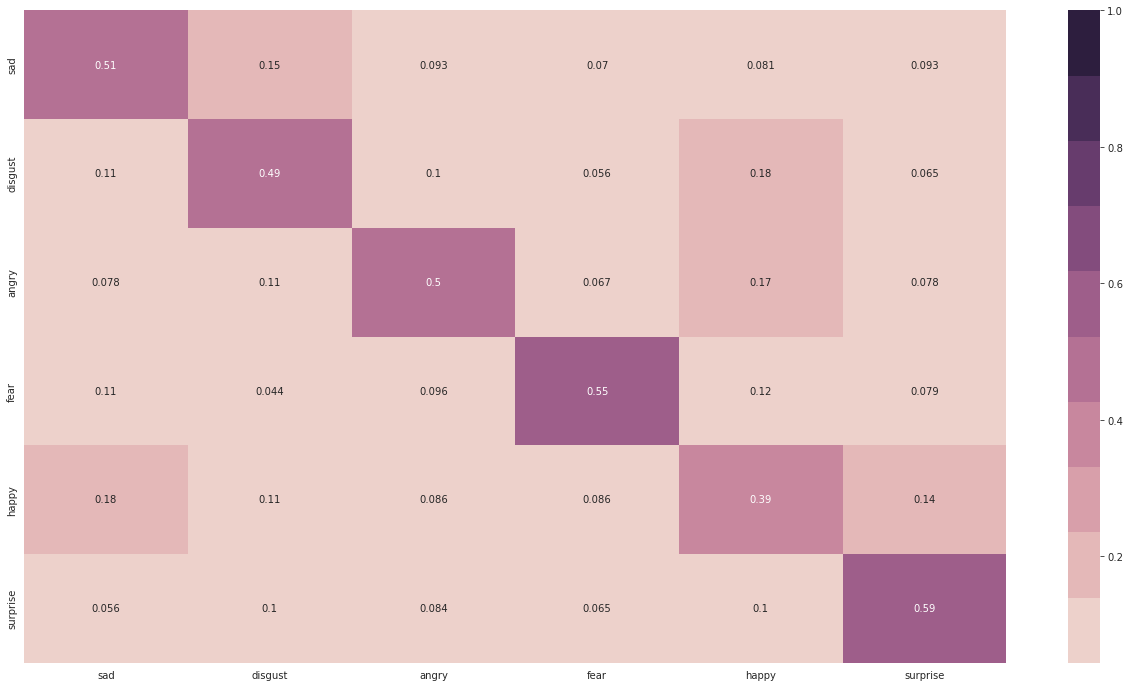

In [32]:
classifer = MultinomialNB()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [33]:
from sklearn.svm import SVC

Test set accuracy 0.5188834154351396
              precision    recall  f1-score   support

         sad       0.43      0.50      0.46        86
     disgust       0.58      0.49      0.53       107
       angry       0.51      0.58      0.54        90
        fear       0.60      0.63      0.62       114
       happy       0.42      0.36      0.39       105
    surprise       0.56      0.55      0.55       107

    accuracy                           0.52       609
   macro avg       0.52      0.52      0.51       609
weighted avg       0.52      0.52      0.52       609



C:\Users\moshi\AppData\Local\Temp/ipykernel_18260/3122129258.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


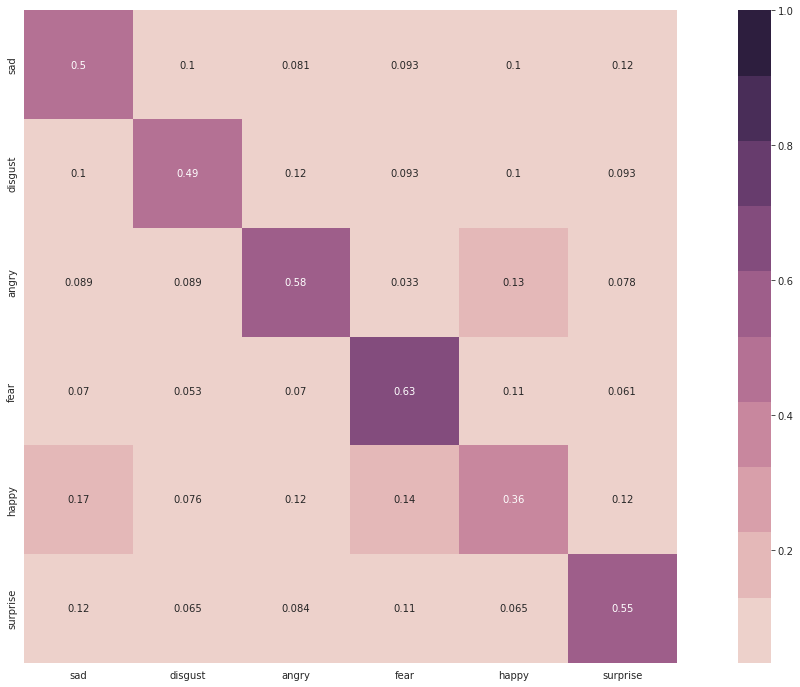

In [34]:
classifer = SVC(kernel='linear')
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [35]:
from xgboost import XGBClassifier

C:\Users\moshi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test set accuracy 0.451559934318555
              precision    recall  f1-score   support

         sad       0.41      0.40      0.40        86
     disgust       0.48      0.39      0.43       107
       angry       0.54      0.42      0.48        90
        fear       0.54      0.50      0.52       114
       happy       0.38      0.41      0.39       105
    surprise       0.41      0.57      0.47       107

    accuracy                           0.45       609
   macro avg       0.46      0.45      0.45       609
weighted avg       0.46      0.45      0.45       609



C:\Users\moshi\AppData\Local\Temp/ipykernel_18260/2874889585.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


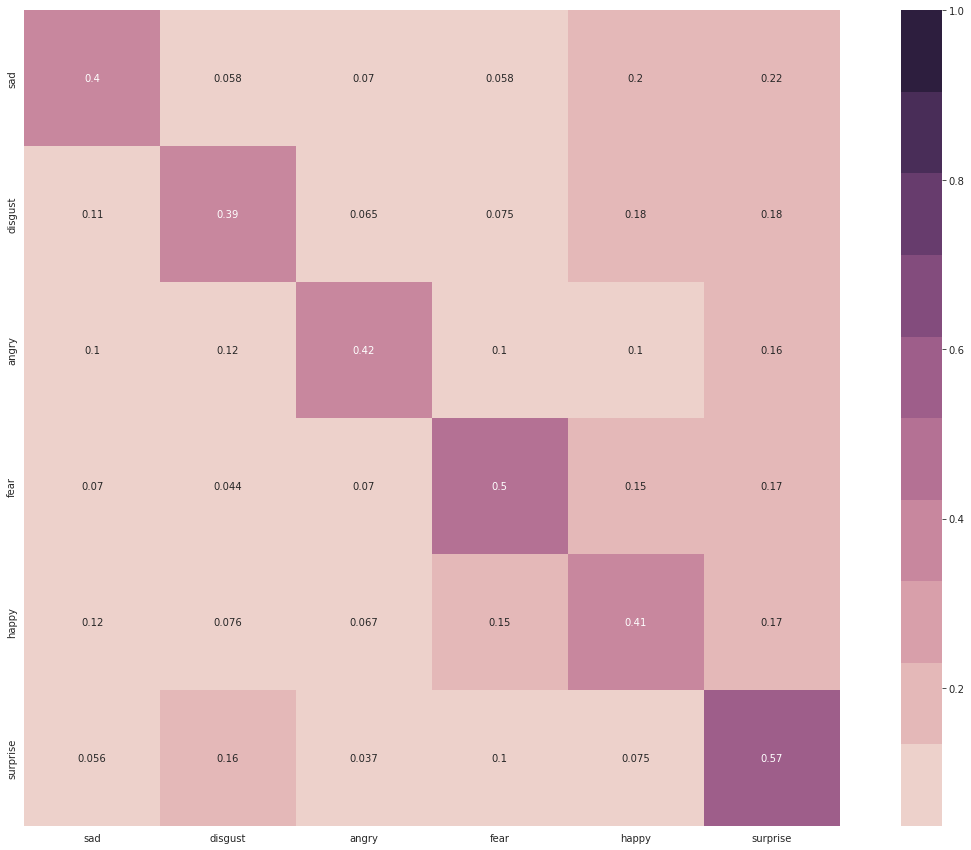

In [36]:
classifer = XGBClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,15))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [37]:
from sklearn.ensemble import AdaBoostClassifier


Test set accuracy 0.2939244663382594
              precision    recall  f1-score   support

         sad       0.22      0.14      0.17        86
     disgust       0.24      0.07      0.10       107
       angry       0.34      0.26      0.29        90
        fear       0.58      0.33      0.42       114
       happy       0.33      0.24      0.28       105
    surprise       0.23      0.69      0.35       107

    accuracy                           0.29       609
   macro avg       0.32      0.29      0.27       609
weighted avg       0.33      0.29      0.27       609



C:\Users\moshi\AppData\Local\Temp/ipykernel_18260/215097931.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


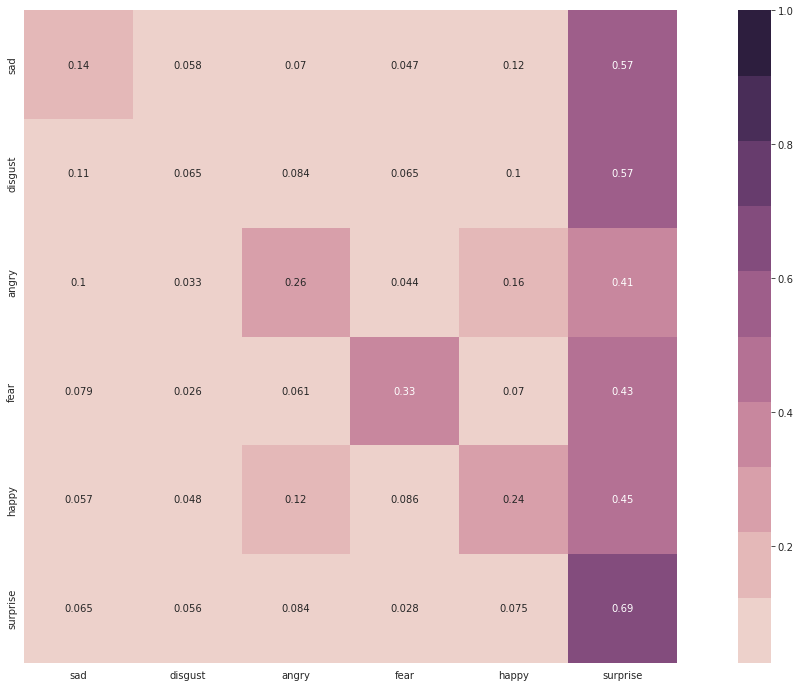

In [38]:
classifer = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [39]:
from sklearn.tree import DecisionTreeClassifier

Test set accuracy 0.49589490968801314
              precision    recall  f1-score   support

         sad       0.37      0.38      0.37        86
     disgust       0.60      0.50      0.54       107
       angry       0.49      0.50      0.50        90
        fear       0.55      0.68      0.60       114
       happy       0.35      0.34      0.34       105
    surprise       0.62      0.54      0.58       107

    accuracy                           0.50       609
   macro avg       0.49      0.49      0.49       609
weighted avg       0.50      0.50      0.50       609



C:\Users\moshi\AppData\Local\Temp/ipykernel_18260/37561862.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


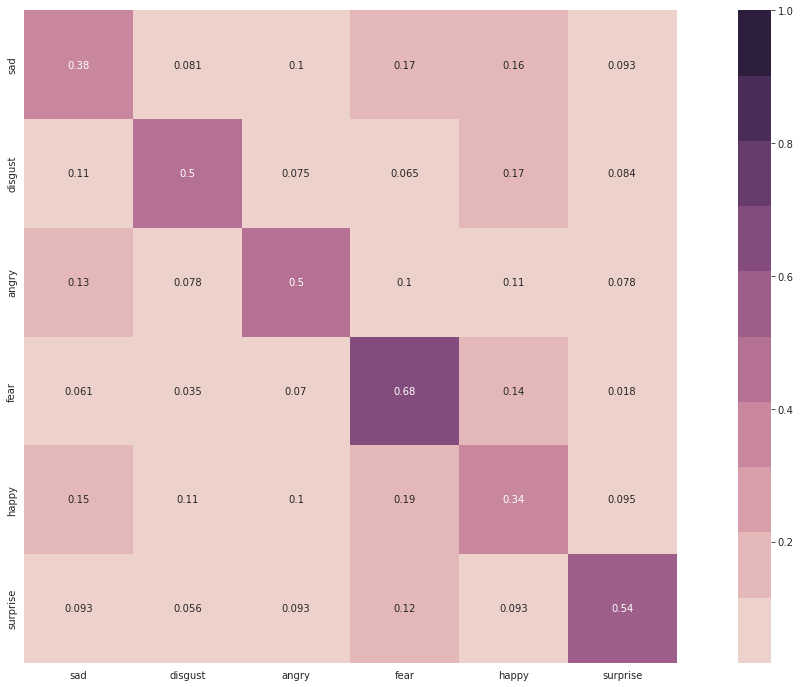

In [40]:
classifer = DecisionTreeClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [41]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.5205254515599343
              precision    recall  f1-score   support

         sad       0.42      0.49      0.45        86
     disgust       0.66      0.43      0.52       107
       angry       0.64      0.50      0.56        90
        fear       0.53      0.69      0.60       114
       happy       0.43      0.36      0.39       105
    surprise       0.51      0.63      0.56       107

    accuracy                           0.52       609
   macro avg       0.53      0.52      0.51       609
weighted avg       0.53      0.52      0.52       609



C:\Users\moshi\AppData\Local\Temp/ipykernel_18260/519492484.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


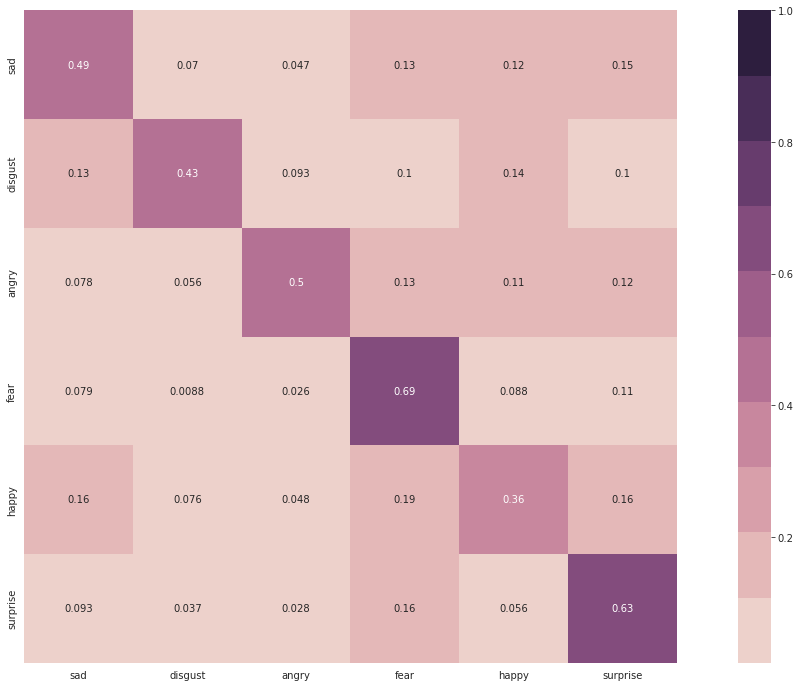

In [42]:
classifer = RandomForestClassifier(n_estimators=100)
shapas = classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [43]:
from sklearn.linear_model import SGDClassifier

Test set accuracy 0.5106732348111659
              precision    recall  f1-score   support

         sad       0.47      0.52      0.49        86
     disgust       0.63      0.49      0.55       107
       angry       0.53      0.56      0.54        90
        fear       0.60      0.59      0.60       114
       happy       0.36      0.30      0.33       105
    surprise       0.47      0.61      0.53       107

    accuracy                           0.51       609
   macro avg       0.51      0.51      0.51       609
weighted avg       0.51      0.51      0.51       609



C:\Users\moshi\AppData\Local\Temp/ipykernel_18260/2839143634.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


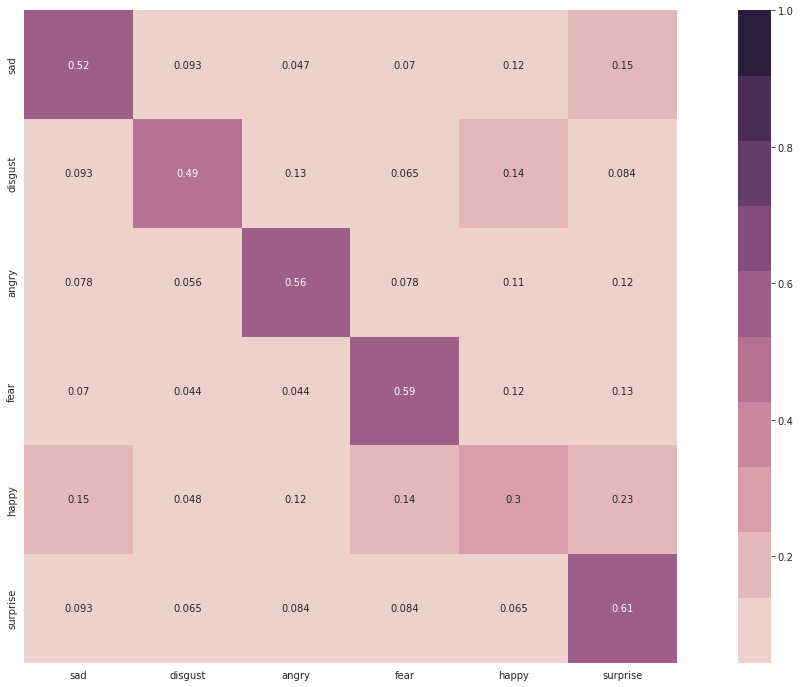

In [44]:
classifer = SGDClassifier()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [45]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

Test set accuracy 0.35139573070607555
              precision    recall  f1-score   support

         sad       0.34      0.29      0.31        86
     disgust       0.53      0.21      0.31       107
       angry       0.37      0.40      0.39        90
        fear       0.29      0.84      0.43       114
       happy       0.55      0.06      0.10       105
    surprise       0.50      0.26      0.34       107

    accuracy                           0.35       609
   macro avg       0.43      0.34      0.31       609
weighted avg       0.43      0.35      0.31       609



C:\Users\moshi\AppData\Local\Temp/ipykernel_18260/4185345786.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


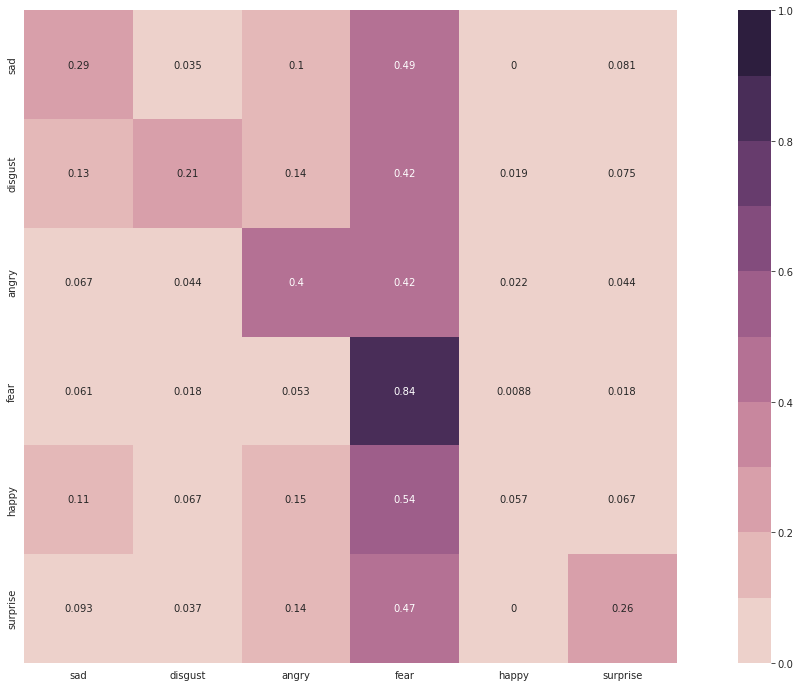

In [46]:
classifer = KNeighborsClassifier(n_neighbors=3)
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [47]:
from sklearn.linear_model import LogisticRegression

Test set accuracy 0.5320197044334976
              precision    recall  f1-score   support

         sad       0.46      0.50      0.48        86
     disgust       0.62      0.50      0.56       107
       angry       0.58      0.57      0.57        90
        fear       0.62      0.64      0.63       114
       happy       0.39      0.35      0.37       105
    surprise       0.51      0.62      0.56       107

    accuracy                           0.53       609
   macro avg       0.53      0.53      0.53       609
weighted avg       0.53      0.53      0.53       609



C:\Users\moshi\AppData\Local\Temp/ipykernel_18260/3294884351.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = (cm.T / cm.astype(np.float).sum(axis=1)).T


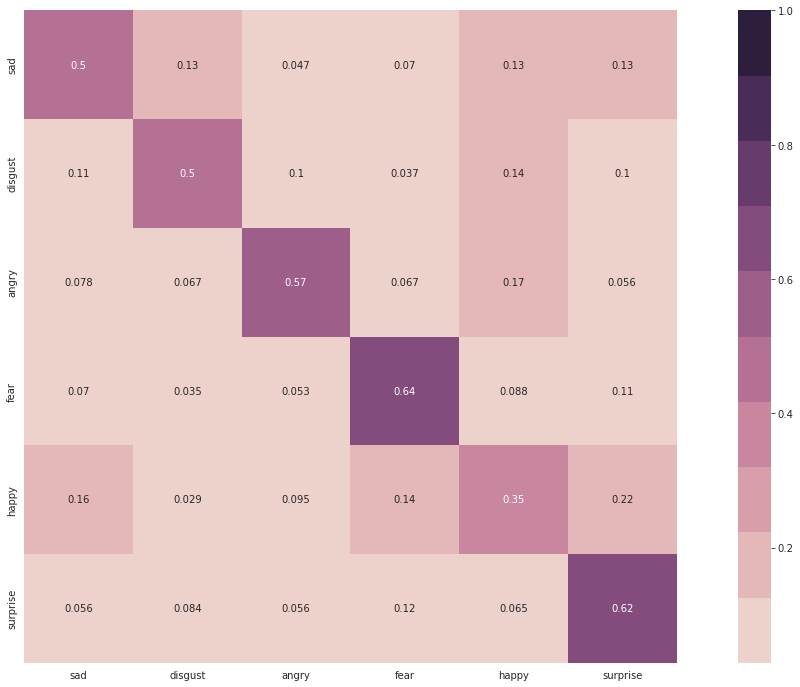

In [48]:
classifer = LogisticRegression()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(np.float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, square=True, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
